In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n, a, c = 10000, 1.5, 3.5
G = nx.DiGraph()
for i in range(0,n):
    G.add_node(i)
    for j in range(0,int(np.random.normal(c, c/5, 1)[0])):
        if random.uniform(0,1) < c/(c+a) or (i==0 and j==0):
            G.add_edge(i,random.randint(0,i))
        else:
            G.add_edge(i,random.choices(list(G.out_edges()),k=1)[0][1])

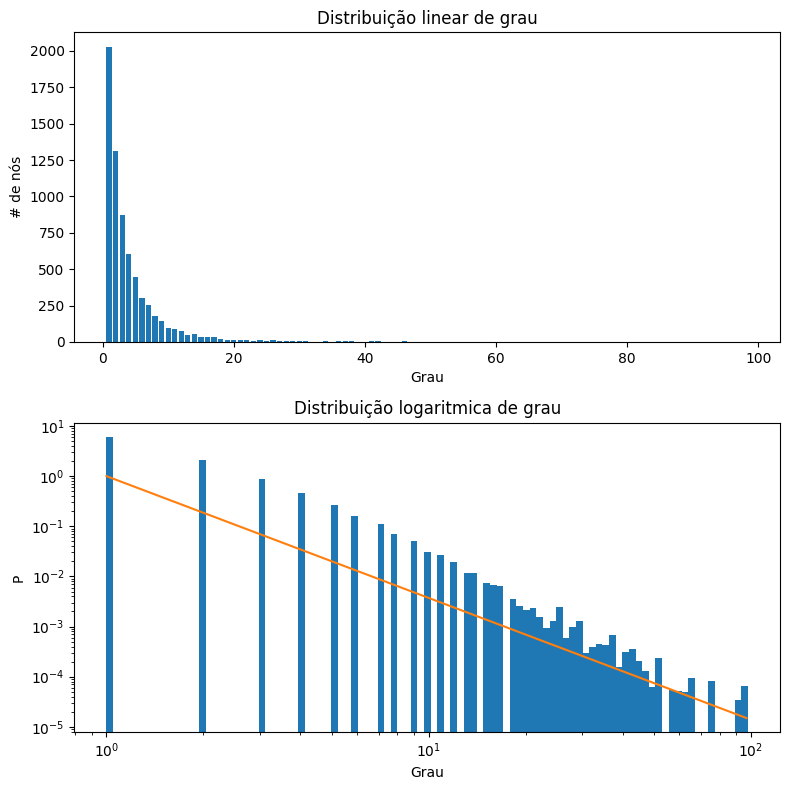

In [4]:
fig = plt.figure("Degree of a random graph", figsize=(8, 8))
axgrid = fig.add_gridspec(6, 4)
degree_sequence = sorted((d for n, d in G.in_degree() if d >0), reverse=True)

ax0 = fig.add_subplot(axgrid[0:3, :])
ax0.bar(*np.unique(degree_sequence, return_counts=True))
ax0.set_title("Distribuição linear de grau")
ax0.set_xlabel("Grau")
ax0.set_ylabel("# de nós")

ax1 = fig.add_subplot(axgrid[3:, :])
start, stop = np.log10(min(degree_sequence)), np.log10(max(degree_sequence))
bins = 10 ** np.linspace(start, stop, max(degree_sequence))

ax1.hist(degree_sequence, log=True, density=True, bins=bins)
ax1.set_xscale('log')
x = list(range(1,max(degree_sequence)))
y = [x**-(2+a/c) for x in x]
ax1.plot(x,y, '-') 
ax1.set_title("Distribuição logaritmica de grau")
ax1.set_xlabel("Grau")
ax1.set_ylabel("P")

fig.tight_layout()
plt.show()
